In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA 
import seaborn as sns

# Load and Standardize Data

In [9]:
data = pd.read_csv('PCA_practice_dataset.csv')
X = data.iloc[:, :-1].values

In [13]:
def standardize_data(arr):
    rows, columns = arr.shape
    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)
    for column in range(columns):
        mean = np.mean(X[:,column])
        std = np.std(X[:,column])
        tempArray = np.empty(0)
    
    for element in X[:,column]:
        
        tempArray = np.append(tempArray, ((element - mean) / std))
    standardizedArray[:,column] = tempArray
    return standardizedArray

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Covariance Matrix and Eigen decomposition

In [15]:
features = X.T
cov_matrix = np.cov(features)

In [17]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[-0.20713531 -0.09061443 -0.23094464 ... -0.08166291  0.18018287
  -0.0648254 ]
 [-0.2039369  -0.10935753  0.21993356 ...  0.13264327 -0.26598478
  -0.07421891]
 [ 0.06381716 -0.25194137  0.04435315 ... -0.03848135  0.17187279
  -0.05397131]
 ...
 [ 0.15768566 -0.18987939 -0.04996353 ...  0.09332458  0.34932371
   0.05100056]
 [-0.20611455 -0.09179469 -0.246731   ... -0.09066797  0.02465579
  -0.24104041]
 [-0.20295623 -0.10922431  0.20650669 ...  0.06086623  0.0298005
   0.14472091]] 

Eigenvalues: 
 [1.71691440e+01 1.27185898e+01 1.17755546e+00 7.35409584e-01
 5.87526618e-01 3.92436510e-01 3.60085817e-01 1.21640421e-01
 1.13549579e-01 7.99259656e-02 7.31844109e-02 5.38728351e-02
 4.97627076e-02 3.99197842e-02 3.47325621e-02 3.59812257e-02
 2.65419761e-02 2.35937979e-02 2.33925968e-02 5.73741232e-03
 2.09263680e-02 1.99260765e-02 7.09343835e-03 7.98736634e-03
 8.97932666e-03 9.27284032e-03 1.06815753e-02 1.13838899e-02
 1.60165487e-02 1.52386618e-02 1.48165307e-02 1.39

In [18]:
eig_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
17.169144010332204
12.718589795380487
1.1775554605059546
0.7354095836354944
0.5875266178528442
0.392436509815379
0.3600858168540083
0.12164042085405485
0.1135495785202917
0.079925965577728
0.07318441088608148
0.053872835142702614
0.04976270762478869
0.03991978421552747
0.03473256206918919
0.03598122571816435
0.02654197608232697
0.023593797947327116
0.02339259677223338
0.005737412318959515
0.020926367991898915
0.019926076490595874
0.007093438345993575
0.007987366335269563
0.008979326658424297
0.009272840316974304
0.01068157527362318
0.011383889939443254
0.016016548732695913
0.01523866181852855
0.014816530723164533
0.013923288051121724
0.012459925348436433
0.012939951589475513


# Singular Value Decomposition (SVD)

In [19]:
eigen_vec_svd, s, v = np.linalg.svd(X.T)
print(eigen_vec_svd)

[[-0.20713531  0.09061443  0.23094464 ...  0.12971407 -0.17096484
  -0.03925088]
 [-0.2039369   0.10935753 -0.21993356 ... -0.21832987  0.37254419
   0.16529199]
 [ 0.06381716  0.25194137 -0.04435315 ...  0.04901028 -0.08115143
  -0.01216503]
 ...
 [ 0.15768566  0.18987939  0.04996353 ...  0.02183773  0.10515805
  -0.04631569]
 [-0.20611455  0.09179469  0.246731   ...  0.12464757  0.10438586
  -0.03645938]
 [-0.20295623  0.10922431 -0.20650669 ... -0.20537222 -0.26304665
   0.18791061]]


# Find the right singular vectors

In [20]:
eigen_vector_ls = []

for i in range(eigen_vectors.shape[1]):
    eig1 = features.T@eigen_vectors[:,i]
    eig1 = eig1/eigen_values[i]
    eigen_vector_ls.append(np.ravel(eig1))
print(eigen_vector_ls)

[array([-0.09554255, -0.10568133, -0.08771916, ..., -0.10378475,
       -0.11741972, -0.12798319]), array([-0.3081025 , -0.22854565, -0.19264344, ...,  0.33604936,
        0.2651531 ,  0.34779829]), array([ 1.03482354,  1.53418919,  1.44208968, ..., -0.0245133 ,
        0.05955414,  0.03277699]), array([-0.53082216, -1.19867889,  0.96207855, ..., -0.08280567,
       -0.0747347 ,  0.40131724]), array([ 0.469281  , -1.37112837,  1.11575082, ..., -1.55497195,
        1.00859616,  0.93287495]), array([-0.17589095,  2.62426785, -2.13803361, ...,  0.49789304,
        0.1390925 ,  0.63839358]), array([-0.63219966,  1.59920001, -0.17815088, ..., -0.32239559,
       -0.02003583,  0.45937891]), array([-0.61308103,  0.80158029,  2.5899895 , ...,  1.30334638,
        0.64835868,  1.06754783]), array([-1.42890182,  1.10609845,  1.92374368, ..., -1.67656008,
       -0.70666505,  0.65709339]), array([ 5.23520057,  6.20207409, -4.21443635, ...,  1.87313819,
        1.17761959, -0.63025772]), array([-3

In [21]:
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

[50.49120238303361, 37.402964935170154, 3.462967695877698, 2.1627003710503425, 1.7278045632079952, 1.1540814863953293, 1.0589442224431502, 0.35772145097061414, 0.3339278152787351, 0.2350471346280215, 0.21522149846891114, 0.1584298099253564, 0.1463427029500651, 0.11739652848739943, 0.10214189010595734, 0.10581397352320875, 0.07805492721197568, 0.06938489341262426, 0.06879319884443562, 0.016872643527083436, 0.061540486863233004, 0.05859881891496917, 0.020860459374305335, 0.023489332368511112, 0.026406499898948527, 0.02726966800605477, 0.031412490837374026, 0.0334778653200596, 0.04710163785996588, 0.04481401970086012, 0.043572612059607316, 0.04094575445365247, 0.03664228176237551, 0.038053948067398376]


# Finding the principal components

In [22]:
sort_idx = np.argsort(eigen_values) ## indices for eigenvalues which are in ascending order
sort_idx = sort_idx[::-1]

eigen_values_sum = np.sum(eigen_values)
temp_sum = 1
principal_eigen_vector = []
principal_eigen_values = []
i=0
while(0.9<temp_sum<0.97*eigen_values_sum):
    principal_eigen_vector.append(eigen_vector_ls[sort_idx[i]])
    principal_eigen_values.append(eigen_values[sort_idx[i]])
    temp_sum += eigen_values[sort_idx[i]]
    i += 1
print("Number of components is {}".format(i))

Number of components is 5


In [24]:
# cumulative_variance_explained = np.cumsum(variance_explained)
# print(cumulative_variance_explained)
pca = PCA(n_components=i)
pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.50491202, 0.37402965, 0.03462968, 0.021627  , 0.01727805])

# Scree Plot

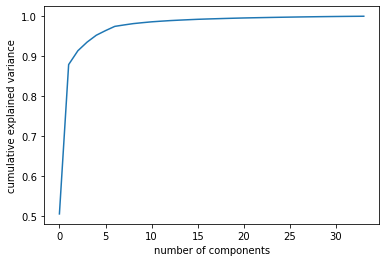

In [25]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

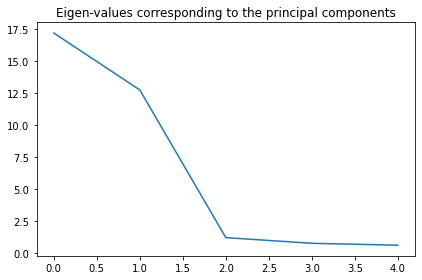

In [26]:
fig, ax = plt.subplots()

ax.plot(principal_eigen_values)
ax.set_title("Eigen-values corresponding to the principal components")

plt.tight_layout()